### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.0,Real Bed,1.0,1.0,4,NaN,NaN,moderate,San Francisco,30.0,0.0,1,1.0,73070632,0.0,0.0,Tina,87.0,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.710475,-122.449333,1125,6,NaN,Outer Mission,7,45.0,Condominium,0,0,1,97.0,0.57,Private room,100.0,NaN,94112.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.0,Real Bed,1.0,1.0,33,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,2.0,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,148.0,Apartment,0,0,1,100.0,0.18,Entire home/apt,1500.0,NaN,94133.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.0,Real Bed,1.0,1.0,32,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,96.0,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,144.0,Apartment,0,0,1,100.0,0.24,Entire home/apt,1500.0,NaN,94133.0


# What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?

**Prepare Data**

In [19]:
#Get daily gross rental income
daily_gross = df.groupby('last_review')['price'].sum()

#Get daily gross rental income
daily_rentals = df.groupby('last_review')['price'].count()

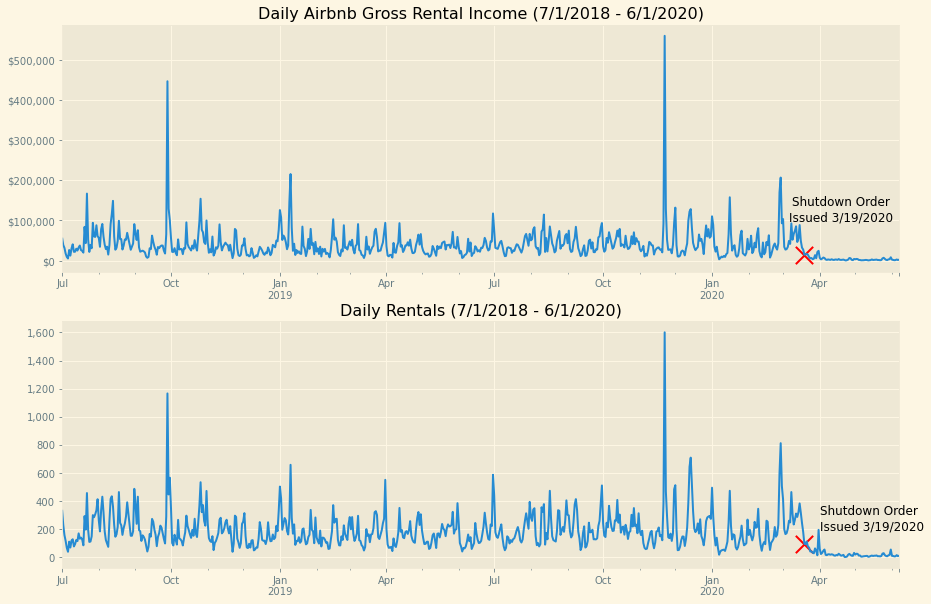

In [20]:
#Create fig
f, ax = plt.subplots(2,1,figsize = (15,10))

#Plot total revenue each day
daily_gross.plot(ax=ax[0])
ax[0].scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].set_xlabel('')
ax[0].set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')
ax[0].text('2020-04-19', 100_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);


#Plot total revenue each day
daily_rentals.plot(ax=ax[1])

#Add text for Shut down
X='2020-03-19'
Y = daily_rentals.iloc[daily_rentals.index == '2020-03-19']
ax[1].scatter(X,Y, color = 'red',  marker='x',s=300,  edgecolors='black')

#Set plot aesthetics
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].set_xlabel('')
ax[1].set_title('Daily Rentals (7/1/2018 - 6/1/2020)')

ax[1].text('2020-04-01' ,Y + 100, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='left',);

#Stay at home order March 19 2020

# Decomposition

In [8]:
#Read in seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to original and zoomed daily_gross
results = seasonal_decompose(daily_gross, )

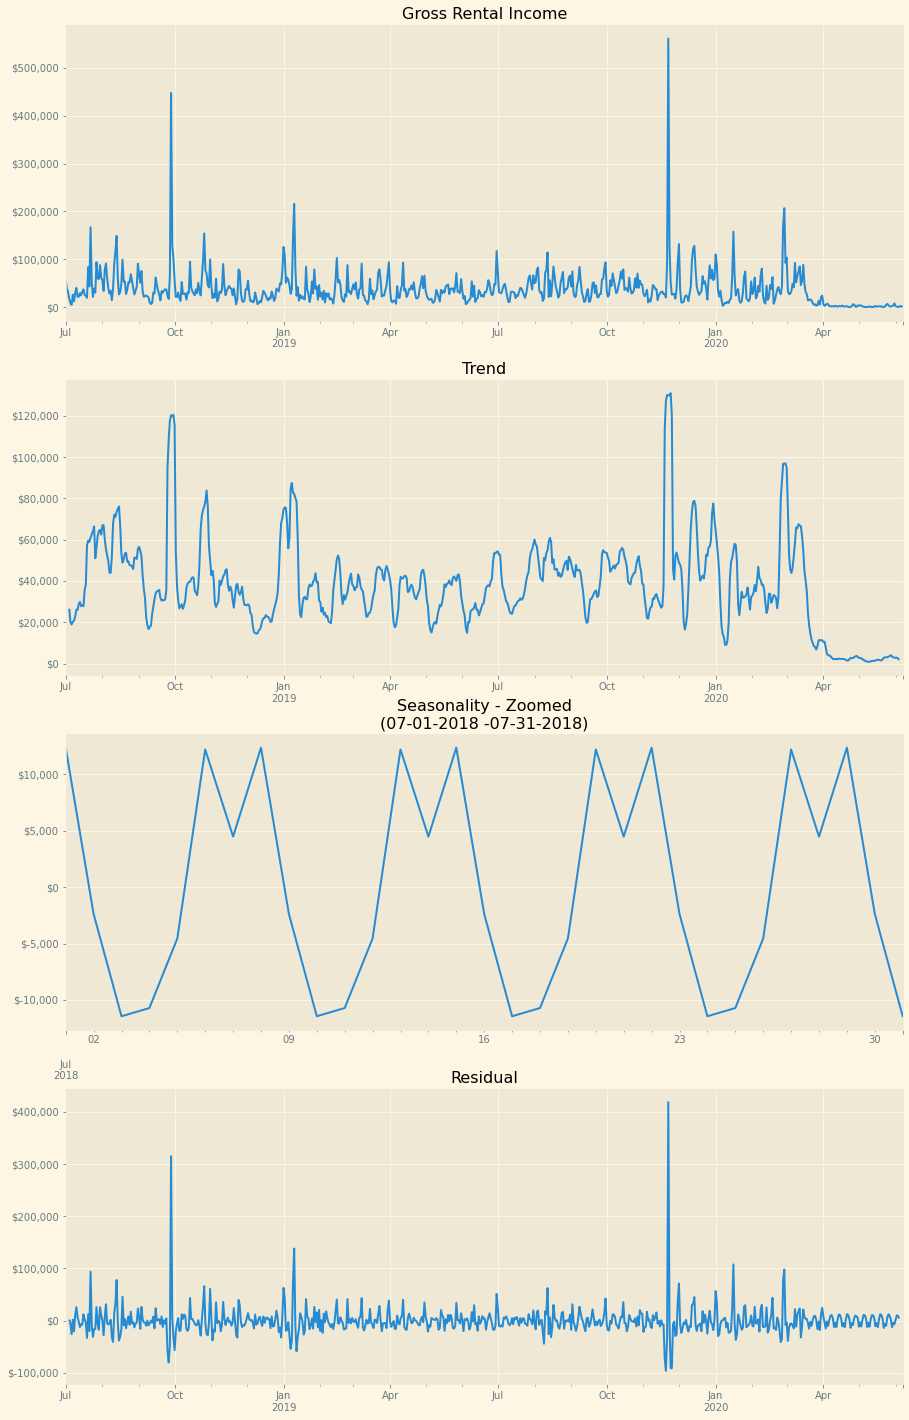

In [9]:
#Create figure to plot time series components
f, axes = plt.subplots(4,1, figsize= (15,25))

#Plot data
daily_gross.plot(ax=axes[0], title = 'Gross Rental Income') #original time series
results.trend.plot(ax=axes[1], title = 'Trend') #trend
results.seasonal.plot(ax=axes[2], title = 'Seasonality - Zoomed\n(07-01-2018 -07-31-2018)', xlim = ['07-01-2018','07-31-2018']) #trend
results.resid.plot(ax=axes[3], title = 'Residual')

#Set plot aesthtics
for ax in axes:
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    ax.set_xlabel('')

### Make Data Stationary

In [10]:
#Append Stationary and trend values to daily gross
daily_gross = daily_gross.reset_index()
daily_gross.columns = ['date','gross']
daily_gross.set_index('date',inplace = True)
daily_gross['seasonal'] = results.seasonal.values
daily_gross['trend'] = results.trend.values

#Drop missing values and make data stationary
daily_gross.dropna(inplace = True, axis = 0)
daily_gross['gross_stationary'] = daily_gross.gross  - daily_gross.seasonal - daily_gross.trend

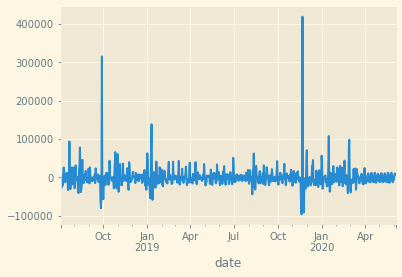

In [11]:
daily_gross.gross_stationary.plot()

In [12]:
#Read in Augmented Dickey-Fuller and KPSS tests from local machine
from Time_Series_Tests import ADF_KPSS_test

#Test stationarity
ADF_KPSS_test(daily_gross['gross_stationary'])

ADF Statistic: -11.790504636524366
P-Value: 9.85245031885123e-22
Critical Values 1% : -3.44
Critical Values 5% : -2.8658
Critical Values 10% : -2.569
KPSS Statistic: 0.02172146177467699
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739



C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# Modeling Airbnb Daily Gross Income

**Prepare data**

In [ ]:
#Data starts at 7/4/2018(Q3) and ends 6/4/2020(Q2 ends 6/30) 702 days of data total
#Q3 is 7/1/2020 - 9/30/2020
# each quarter is  91.25 days

## Build base model - Daily Persistence forecast

In [16]:
#3/19 - 6/4 (77 days)

702

In [ ]:
SES

- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [7]:
#Create dataframe that contains id, name, # of listings, #of properties,  gross income, and super host flag for each renter
host_metrics = pd.DataFrame(df.groupby(['host_id','host_name'])['id'].agg(total_listings = 'count'))
host_metrics['properties'] = df.groupby(['host_id','host_name'])['id'].nunique().values#,'unique_listings':pd.Series.nunique})
host_metrics['gross_income'] = df.groupby(['host_id','host_name'])['price'].sum().values
host_metrics['superhost?'] = df.groupby(['host_id','host_name'])['host_is_superhost'].sum().values
host_metrics['superhost?'] = host_metrics['superhost?'].apply(lambda x: False if x == 0 else True)
host_metrics['avg_monthly_bookings'] = host_metrics['total_listings']/24

#Tidy cols
host_metrics.sort_values(by = 'properties',ascending = False,inplace = True)
host_metrics = host_metrics.reindex(sorted(host_metrics.columns), axis=1)

#Check
display(host_metrics.head(10))

,,avg_monthly_bookings,gross_income,properties,superhost?,total_listings
host_id,host_name,,,,,
48005494,Zeus,82.208333,381849.0,155,True,1973
219930816,Sonder (San Francisco),35.291667,149725.0,107,False,847
4430421,Landmark,43.208333,90084.0,64,False,1037
64646820,Michelle,28.666667,134789.0,53,True,688
173206762,Stratford,23.083333,42184.0,50,False,554
17042045,The Bartlett,26.000000,61619.0,49,False,624
70722023,Michael,26.541667,57202.0,49,True,637
103340667,Sheena,25.375000,88086.0,44,False,609
117141107,Zarinah,32.583333,59570.0,43,True,782


**Who are these hosts?**

7 of the top 10 property holders on Airbnb in SF are hotels or fully-furnished rental comanies(for short and long-term rent). These incluse:
- Zeus(furnished home living)
- Sonder(furnished rental)
- Landmark(hotel)
- Stratford(hotel)
- The Bartlett(hotel)
- Blueground(fully furnished apartments)

**What kinds of properties do the top hosts have?**


**What do we know about these hosts?**

** What kinds of properties do the top of the top have and how many?**

**What % of the total revenue are these people responsible for?**

- What kinds of properties are these and how do they compare to other hosts

**Check price distribution w/ and w/o outliers